### 1.Projete um filtro passa-faixa usando a janela de Hamming, a janela de Hanning e janela de Blackman que satisfaça a especificação a seguir.

- $M = 10, 100, 1000$
- $\Omega_{c1} = 10$ rad/s
- $\Omega_{c2} = 35$ rad/s
- $\Omega_{s }= 100$ rad/s

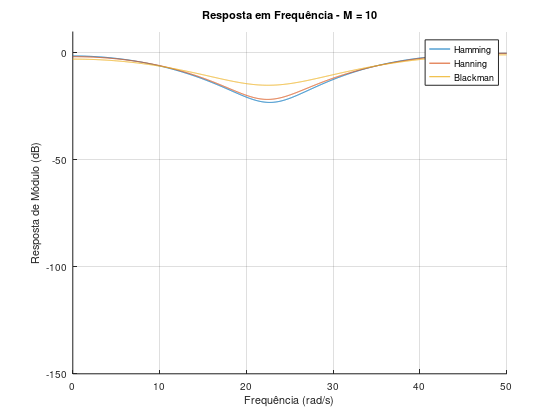

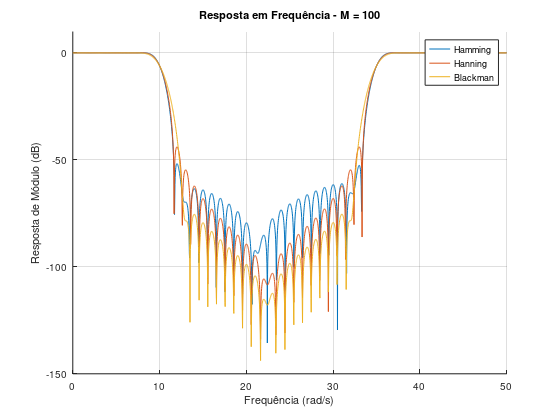

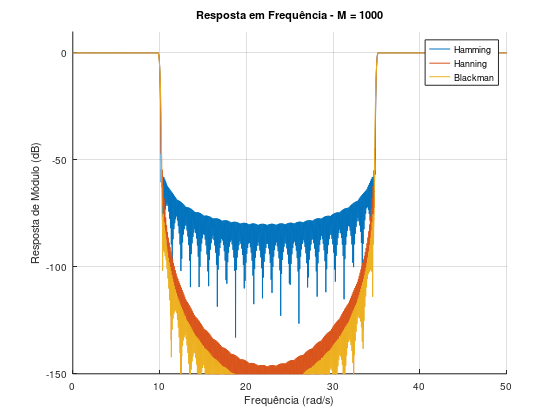

In [1]:
Omega_c1 = 10; 
Omega_c2 = 35;
Omega_s = 100;

wc1 = Omega_c1 * 2 * pi / Omega_s;
wc2 = Omega_c2 * 2 * pi / Omega_s;

M_values = [10, 100, 1000];

for i = 1:length(M_values)
    M = M_values(i);
    n = 1:M/2;

    % Filtro ideal
    h0 = 1 - (wc2 - wc1) / pi;
    haux = (sin(wc1.*n) - sin(wc2.*n)) ./ (pi.*n);
    h_ideal = [fliplr(haux) h0 haux];

    % Janela de Hamming
    h_aux = hamming(M + 1)';
    h_ham = h_ideal .* h_aux;
    [H_hamming, w_hamming] = freqz(h_ham, 1, 2048, Omega_s);

    % Janela de Hanning
    h_aux = hanning(M + 1)';
    h_han = h_ideal .* h_aux;
    [H_hanning, w_hanning] = freqz(h_han, 1, 2048, Omega_s);
    
    % Janela de Blackman
    h_aux = blackman(M + 1)';
    h_black = h_ideal .* h_aux;
    [H_blackman, w_blackman] = freqz(h_black, 1, 2048, Omega_s);

    figure; hold on; grid on;
   
    plot(w_hamming, 20*log10(abs(H_hamming)), 'DisplayName', 'Hamming');
    plot(w_hanning, 20*log10(abs(H_hanning)), 'DisplayName', 'Hanning');
    plot(w_blackman, 20*log10(abs(H_blackman)), 'DisplayName', 'Blackman');
    
    legend();
    title(['Resposta em Frequência - M = ', num2str(M)]);
    ylabel('Resposta de Módulo (dB)');
    xlabel('Frequência (rad/s)');
    axis([0 Omega_s/2 -150 10]);

end

### 2. Projete um filtro que satisfaça as especificações a seguir, usando a janela de Kaiser: 

- $Ap = 1$,0 dB
- $Ar = 40$ dB
- $\Omega_{p} = 1000$ rad/s
- $\Omega_{r} = 1200$ rad/s
- $\Omega_{s} = 5000$ rad/s

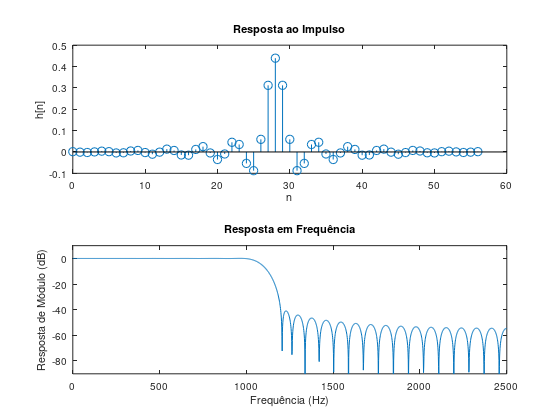

In [2]:
pkg load signal
clear all; close all; clc;

Ap = 1;
Ar = 40;
Omega_p = 1000;
Omega_r = 1200;
Omega_s = 5000;

F = [Omega_p Omega_r];
A = [1 0];

delta_p = (10^(0.05*Ap) - 1)/(10^(0.05*Ap) + 1);
delta_r = 10^(-0.05*Ar);
ripples = [delta_p delta_r];

[M,Wn,beta,FILTYPE] = kaiserord(F,A,ripples,Omega_s);
kaiser_win = kaiser(M+1,beta);

h = fir1(M,Wn,FILTYPE,kaiser_win,'noscale');
[H,w]=freqz(h,1,2048,Omega_s);

figure;

subplot(211);
stem(0:M,h)
ylabel('h[n]');
xlabel('n');
title('Resposta ao Impulso');

subplot(212);
plot(w,20*log10(abs(H)))
axis([0 Omega_s/2 -90 10])
title('Resposta em Frequência');
xlabel('Frequência (Hz)');
ylabel('Resposta de Módulo (dB)');

### 2. Projete um filtro que satisfaça as especificações a seguir, usando a janela de Kaiser: 

- $Ap = 1$,0 dB
- $Ar = 40$ dB
- $\Omega_{p} = 1200$ rad/s
- $\Omega_{r} = 1000$ rad/s
- $\Omega_{s} = 5000$ rad/s

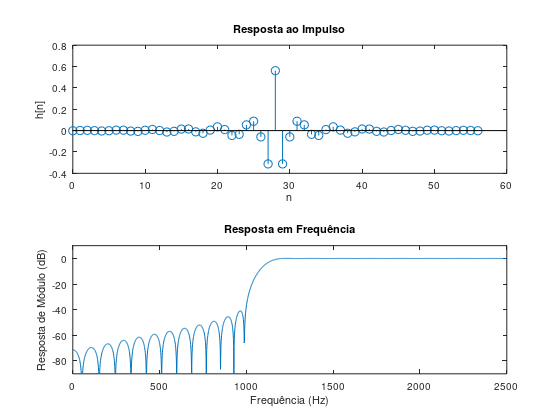

In [3]:
pkg load signal
clear all; close all; clc;

Ap = 1;
Ar = 40;
Omega_p = 1000;
Omega_r = 1200;
Omega_s = 5000;

F = [Omega_p Omega_r];
A = [0 1];

delta_p = (10^(0.05*Ap) - 1)/(10^(0.05*Ap) + 1);
delta_r = 10^(-0.05*Ar);
ripples = [delta_p delta_r];

[M,Wn,beta,FILTYPE] = kaiserord(F,A,ripples,Omega_s);
kaiser_win = kaiser(M+1,beta);

h = fir1(M,Wn,FILTYPE,kaiser_win,'noscale');
[H,w]=freqz(h,1,2048,Omega_s);

figure;

subplot(211);
stem(0:M,h)
ylabel('h[n]');
xlabel('n');
title('Resposta ao Impulso');

subplot(212);
plot(w,20*log10(abs(H)))
axis([0 Omega_s/2 -90 10])
title('Resposta em Frequência');
xlabel('Frequência (Hz)');
ylabel('Resposta de Módulo (dB)');

### 2. Projete um filtro que satisfaça as especificações a seguir, usando a janela de Kaiser: 

- $Ap = 1$,0 dB
- $Ar = 80$ dB
- $\Omega_{p1} = 1000$ rad/s
- $\Omega_{p2} = 1400$ rad/s
- $\Omega_{r1} = 800$ rad/s
- $\Omega_{r2} = 1600$ rad/s
- $\Omega_{s} = 10000$ rad/s

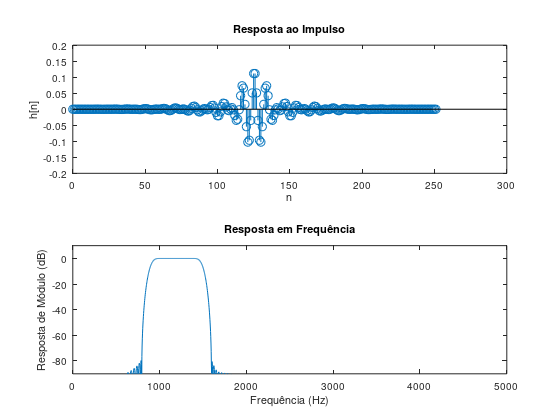

In [4]:
pkg load signal
clear all; close all; clc;

Ap = 1;
Ar = 80;
Omega_p1 = 1000;
Omega_r1 = 800;
Omega_r2 = 1600;
Omega_p2 = 1400;
Omega_s = 10000;

F = [Omega_r1 Omega_p1 Omega_p2 Omega_r2];
A = [0 1 0];

delta_p = (10^(0.05*Ap) - 1)/(10^(0.05*Ap) + 1);
delta_r = 10^(-0.05*Ar);
ripples = [delta_r delta_p delta_r];

[M,Wn,beta,FILTYPE] = kaiserord(F,A,ripples,Omega_s);
kaiser_win = kaiser(M+1,beta);

h = fir1(M,Wn,FILTYPE,kaiser_win,'noscale');
[H,w]=freqz(h,1,2048,Omega_s);

figure;
subplot(211);
stem(0:M,h)
ylabel('h[n]');
xlabel('n');
title('Resposta ao Impulso');

subplot(212);
plot(w,20*log10(abs(H)))
axis([0 Omega_s/2 -90 10])
ylabel('Resposta de Módulo (dB)');
xlabel('Frequência (Hz)');
title('Resposta em Frequência');

### 3. Crie um sinal de entrada composto de três componentes senoidais, nas frequências 50 Hz, 350 Hz e 900 Hz, com Ωs = 2 kHz, com amplitudes de 5, 2 e 1, respectivamente. Projete um filtro usando as janelas retangular, Hamming, Hanning e Blackman para eliminar as componentes de 50 e 900 Hz.

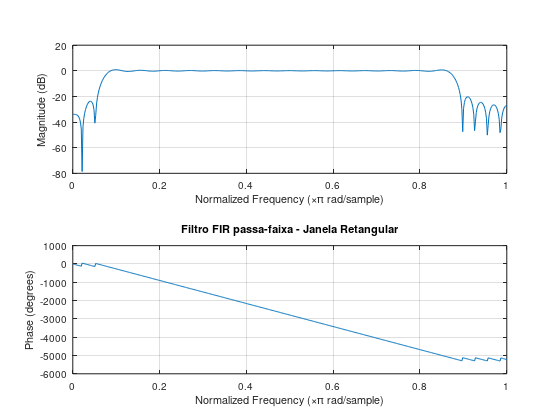

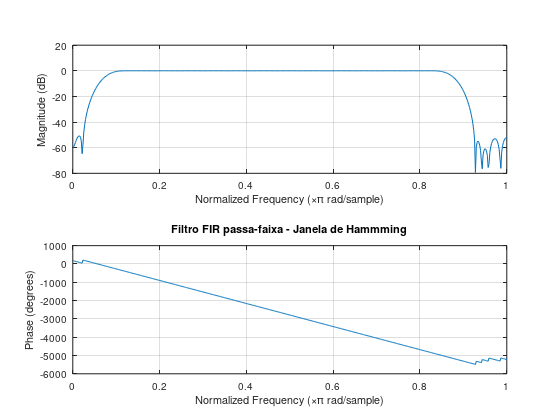

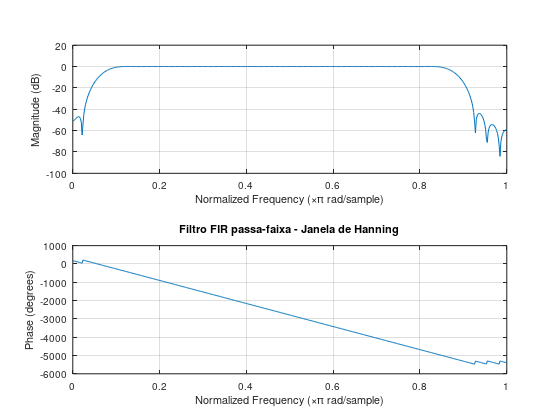

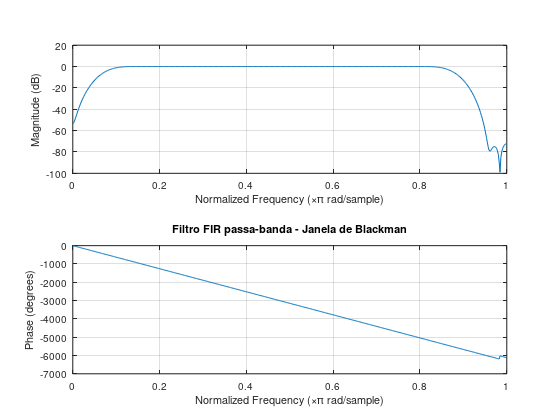

In [5]:
clear all; close all; clc;

dx = 20;
Omega_c1 = 50 + dx;
Omega_c2 = 900 - dx;
Omega_s = 2000;

wc1 = Omega_c1*2*pi/Omega_s;
wc2 = Omega_c2*2*pi/Omega_s;

M = 71;

% Filtro ideal h[n]
n = [-1*((M-1)/2):(M-1)/2];

h_n = ((sin(wc2*n) - sin(wc1*n))./(pi.*n));
h_n(((M-1)/2)+1) = (wc2 - wc1)/pi; 

w_hamm = 0.54 + 0.46*cos(2*n.*pi/(M));
h_hamm = w_hamm.*h_n;

w_hann = 0.5 + 0.5*cos(2*n.*pi/(M));
h_hann = w_hann.*h_n;

w_black = 0.42+0.5*cos(2*n.*pi/(M))+0.08*cos(4*n.*pi/(M)); 
h_black = w_black.*h_n;

figure;
freqz(h_n,1);
title('Filtro FIR passa-faixa - Janela Retangular');

figure;
freqz(h_hamm,1);
title('Filtro FIR passa-faixa - Janela de Hammming');


figure;
freqz(h_hann,1);
title('Filtro FIR passa-faixa - Janela de Hanning');

figure
freqz(h_black,1);
title('Filtro FIR passa-banda - Janela de Blackman');

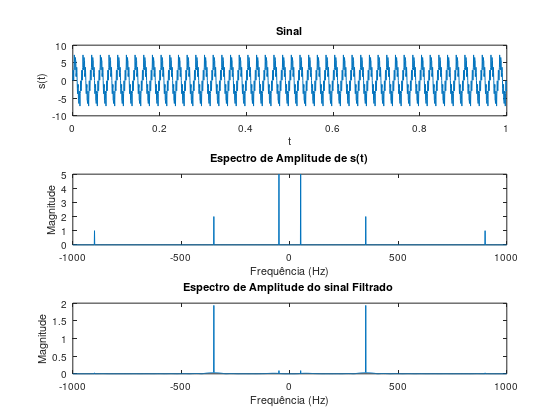

In [6]:
Fs=2000;
Ts=1/Fs;

tmax = 1;
tmin = 0;
t=tmin:Ts:tmax-Ts;
L=(tmax-tmin)/Ts;

s_t = 5*sin(2*pi*50*t) + 2*sin(2*pi*350*t) + sin(2*pi*900*t);
S_f = fft(s_t);
S_f = abs(2*S_f/L);
S_f = fftshift(S_f);
freq = Fs*(-(L/2):(L/2)-1)/L;

figure;
subplot(3,1,1),plot(t,s_t);
title('Sinal')
xlabel('t')
ylabel('s(t)')

subplot(3,1,2);
plot(freq,S_f)
title('Espectro de Amplitude de s(t)')
xlabel('Frequência (Hz)')
ylabel('Magnitude')

h_hamm = w_hamm.*h_n;
h_hann = w_hann.*h_n;
h_black = w_black.*h_n;
s_f_h_ret = filter(h_n,1,s_t);
S_F_h_ret = fft(s_f_h_ret);
S_F_h_ret = abs(2*S_F_h_ret/L);
S_F_h_ret = fftshift(S_F_h_ret);

subplot(3,1,3);
plot(freq,S_F_h_ret);
title('Espectro de Amplitude do sinal Filtrado ');
xlabel('Frequência (Hz)');
ylabel('Magnitude');

### 4. Crie um sinal de entrada composto de três componentes senoidais, nas frequências 770 Hz, 852 Hz e 941 Hz, com Ωs = 8 kHz. Projete três filtros passa-faixa digitais, o primeiro com frequência central em 770 Hz, o segundo em 852 Hz e o terceiro em 941 Hz. Para o primeiro filtro, as extremidades das faixas de rejeição estão nas frequências 697 e 852; para o segundo, em 770 e 941 Hz; para o terceiro. Em 852 e 1209 Hz. Nos três filtros, a atenuação mínima na faixa de rejeição é 60 dB. 

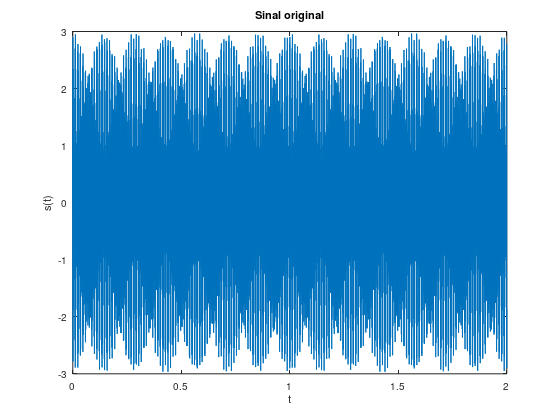

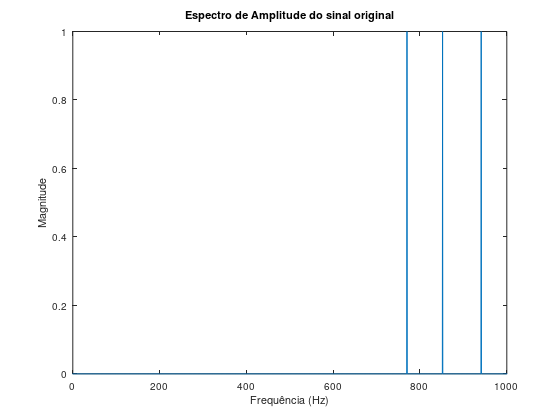

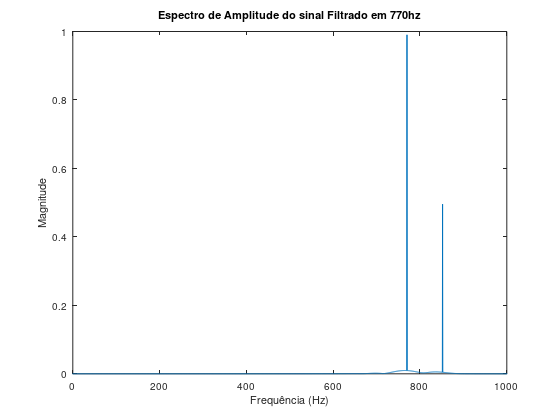

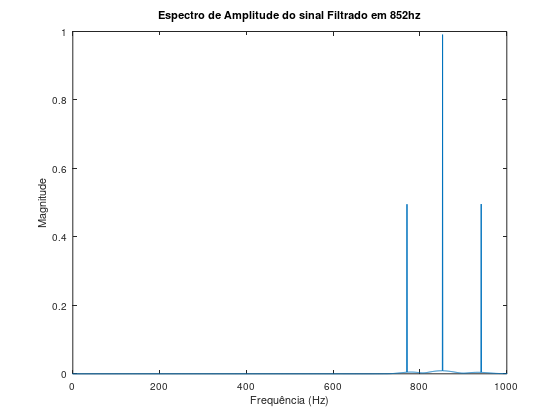

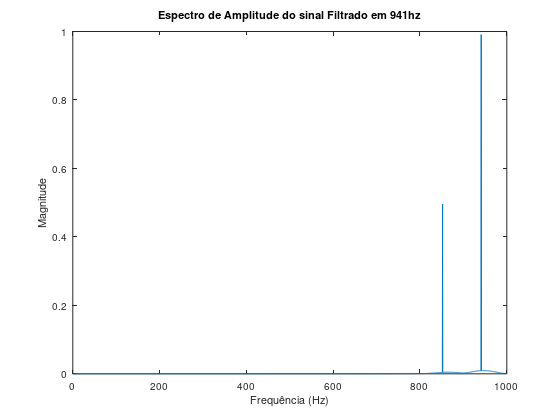

In [11]:
clear all; close all; clc;
M = 301;


% Primeiro Filtro 
Omega_c1 = 697;
Omega_c2 = 852;

% Segundo Filtro
Omega_c3 = 770;
Omega_c4 = 941;

% Terceiro Filtro
Omega_c5 = 852;
Omega_c6 = 1209;

Omega_s = 8000;

wc1 = Omega_c1*2*pi/Omega_s;
wc2 = Omega_c2*2*pi/Omega_s;

wc3 = Omega_c3*2*pi/Omega_s;
wc4 = Omega_c4*2*pi/Omega_s;

wc5 = Omega_c5*2*pi/Omega_s;
wc6 = Omega_c6*2*pi/Omega_s;

% Filtro ideal h[n]
n = [-1*((M-1)/2):(M-1)/2];

h_n = ((sin(wc2.*n) - sin(wc1.*n))./(pi.*n));
h_n(((M-1)/2)+1) = (wc2 - wc1)/pi;

h_n2 = ((sin(wc4.*n) - sin(wc3.*n))./(pi.*n));
h_n2(((M-1)/2)+1) = (wc4 - wc3)/pi;

h_n3 = ((sin(wc6.*n) - sin(wc5.*n))./(pi.*n));
h_n3(((M-1)/2)+1) = (wc6 - wc5)/pi;


w_black = 0.42+0.5*cos(2*n.*pi/(M))+0.08*cos(4*n.*pi/(M)); 

h_black1 = w_black.*h_n;
h_black2 = w_black.*h_n2;
h_black3 = w_black.*h_n3;


Fs=8000;
Ts=1/Fs;

tmin = 0;
tmax = 2;
t=tmin:Ts:tmax-Ts;
L=(tmax-tmin)/Ts;

s_t = sin(2*pi*770*t) + sin(2*pi*852*t) + sin(2*pi*941*t);
S_f = fft(s_t);
S_f = abs(2*S_f/L);
S_f = fftshift(S_f);
freq = Fs*(-(L/2):(L/2)-1)/L;


figure;
plot(t,s_t);
title('Sinal original')
xlabel('t')
ylabel('s(t)')

figure;
plot(freq,S_f)
title('Espectro de Amplitude do sinal original')
xlabel('Frequência (Hz)')
ylabel('Magnitude')
xlim([0 1000])

s_f_h_ret = filter(h_black1,1,s_t);
S_F_h_ret = fft(s_f_h_ret);
S_F_h_ret = abs(2*S_F_h_ret/L);
S_F_h_ret = fftshift(S_F_h_ret);

figure;
plot(freq,S_F_h_ret);
title('Espectro de Amplitude do sinal Filtrado em 770hz')
xlabel('Frequência (Hz)')
ylabel('Magnitude')
xlim([0 1000])

s_f_h_ret2 = filter(h_black2,1,s_t);
S_F_h_ret2 = fft(s_f_h_ret2);
S_F_h_ret2 = abs(2*S_F_h_ret2/L);
S_F_h_ret2 = fftshift(S_F_h_ret2);

figure;
plot(freq,S_F_h_ret2)
title('Espectro de Amplitude do sinal Filtrado em 852hz')
xlabel('Frequência (Hz)')
ylabel('Magnitude')
xlim([0 1000])

s_f_h_ret3 = filter(h_black3,1,s_t);
S_F_h_ret3 = fft(s_f_h_ret3);
S_F_h_ret3 = abs(2*S_F_h_ret3/L);
S_F_h_ret3 = fftshift(S_F_h_ret3);

figure;
plot(freq,S_F_h_ret3)
title('Espectro de Amplitude do sinal Filtrado em 941hz')
xlabel('Frequência (Hz)')
ylabel('Magnitude')
xlim([0 1000])